# Data Import and Prep

In [3]:
!pip install cpi

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 31.0/31.0 MB 21.5 MB/s eta 0:00:00


In [4]:
import cpi as cpi
import pandas as pd
import matplotlib.pyplot as plt
from datetime import date

In [5]:
## Data Import
price_df = pd.read_csv('https://raw.githubusercontent.com/tswiger34/SkiIndustryAnalysis/main/FullPriceHistory.csv')
mp_df = pd.read_csv('https://raw.githubusercontent.com/tswiger34/SkiIndustryAnalysis/main/MegapassPrices.csv')

## Single Mount df Cleaning
# Split Years
price_df[['Start Year', 'End Year']] = price_df['Season'].str.split('-', expand = True)
price_df['End Year'] = pd.to_numeric(price_df['End Year'])
price_df['Start Year'] = pd.to_numeric(price_df['Start Year'])

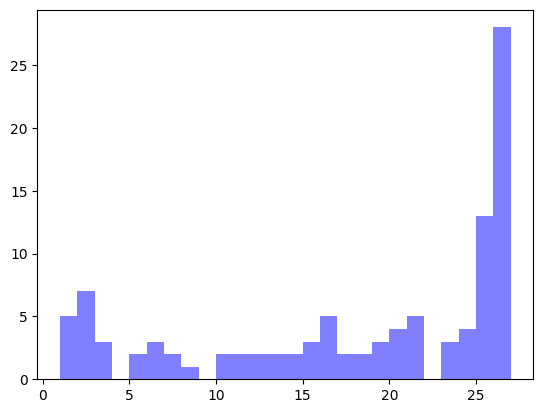

In [6]:
## Distribution of Resort Counts
counts_resorts = price_df['Resort'].value_counts()
plt.hist(counts_resorts, bins=26, alpha=0.5, color='blue')
plt.show()

## Drop Resorts with too few observations
val_counts = price_df['Resort'].value_counts()
to_drop = val_counts.loc[val_counts < 19]

price_df = price_df[~price_df['Resort'].isin(to_drop.index)]

In [7]:
## Change abbreviations for the full state names

state_mapping = {
    'nh': 'New Hampshire',
    'ct': 'Connecticut',
    'vt': 'Vermont',
    'ma': 'Massachusetts',
    'me': 'Maine'
}

# Replace abbreviations with full names using map()
price_df['State'] = price_df['State'].map(state_mapping)

<ipython-input-7-28ab3cc016ab>:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  price_df['State'] = price_df['State'].map(state_mapping)


In [8]:
## Single Mountain Inflation Adjustment
# Adjust season passes
def adjust_price(row):
    return cpi.inflate(row['Season Pass'], date(row['Start Year'],1,1), to=date(2023, 9, 1))

price_df['Season Pass Adj'] = price_df.apply(adjust_price, axis=1)

# Adjust Day Passes
def adjust_price(row):
    return cpi.inflate(row['Day Pass'], date(row['Start Year'],1,1), to=date(2023, 9, 1))

price_df['Day Pass Adj'] = price_df.apply(adjust_price, axis=1)

## Mega Pass Inflation Adjustment

# Adjust to proper datetime format
mp_df['Year'] = pd.to_datetime(mp_df['Year'], format='%Y')

# Epic Pass Adjustment
def adjust_price(row):
    return cpi.inflate(row['Epic'], row['Year'], to=date(2023, 9, 1))
mp_df['Epic Adj'] = mp_df.apply(adjust_price, axis=1)

# Ikon Pass Adjustment
def adjust_price(row):
    return cpi.inflate(row['Ikon'], row['Year'], to=date(2023, 9, 1))
mp_df['Ikon Adj'] = mp_df.apply(adjust_price, axis=1)

<ipython-input-8-afdd14304aac>:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  price_df['Season Pass Adj'] = price_df.apply(adjust_price, axis=1)
<ipython-input-8-afdd14304aac>:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  price_df['Day Pass Adj'] = price_df.apply(adjust_price, axis=1)
/usr/local/lib/python3.10/dist-packages/cpi/__init__.py:109: FutureWarning: Comparison of Timestamp with datetime.date is deprecated in order to match the standard library behavior. In a future version these will be cons

In [9]:
## Identify resorts on mega pass
ikon_resorts = ['Stratton', 'Sugarbush', 'Killington', 'Pico', 'Sunday River', 'Sugarloaf', 'Loon Mountain']
epic_resorts = ['Stowe', 'Okemo', 'Mount Snow', 'Mt. Sunapee', 'Wildcat Mountain', 'Attitash', 'Crotched Mountain']

price_df['Epic Dummy'] = 0
price_df['Ikon Dummy'] = 0
price_df['Epic Dummy'] = price_df['Resort'].isin(epic_resorts).astype(int)
price_df['Ikon Dummy'] = price_df['Resort'].isin(ikon_resorts).astype(int)

<ipython-input-9-4b645418d67b>:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  price_df['Epic Dummy'] = 0
<ipython-input-9-4b645418d67b>:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  price_df['Ikon Dummy'] = 0
<ipython-input-9-4b645418d67b>:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returni

# Dual Axis Graphs

In [ ]:
## Double check naming lines up
ikon_check = price_df.loc[price_df['Ikon Dummy']==1]
print(ikon_check['Resort'].unique())

epic_check = price_df.loc[price_df['Epic Dummy']==1]
print(epic_check['Resort'].unique())

['Killington' 'Loon Mountain' 'Pico' 'Stratton' 'Sugarbush' 'Sugarloaf'
 'Sunday River']
['Attitash' 'Crotched Mountain' 'Mount Snow' 'Mt. Sunapee' 'Okemo' 'Stowe'
 'Wildcat Mountain']


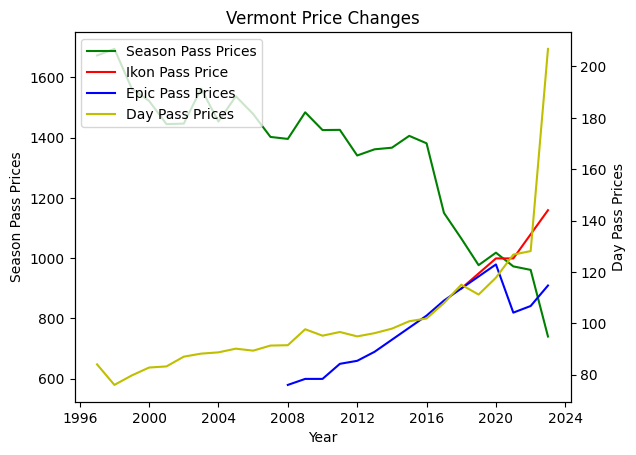

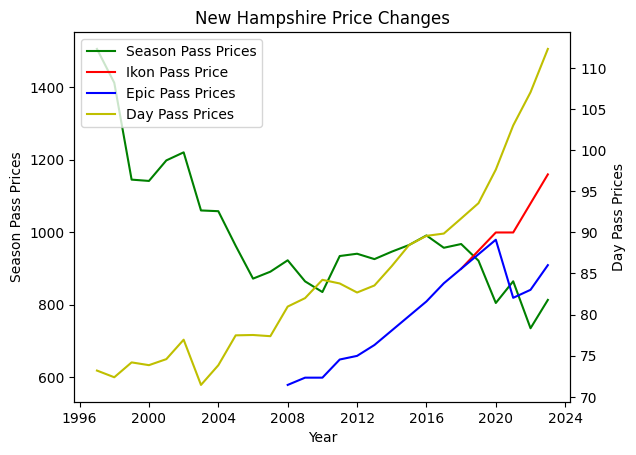

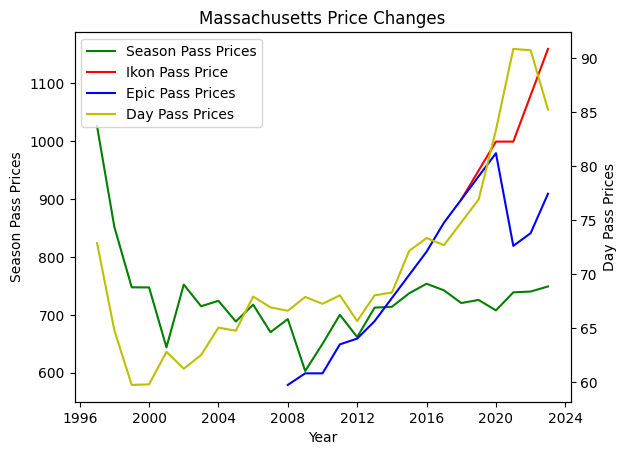

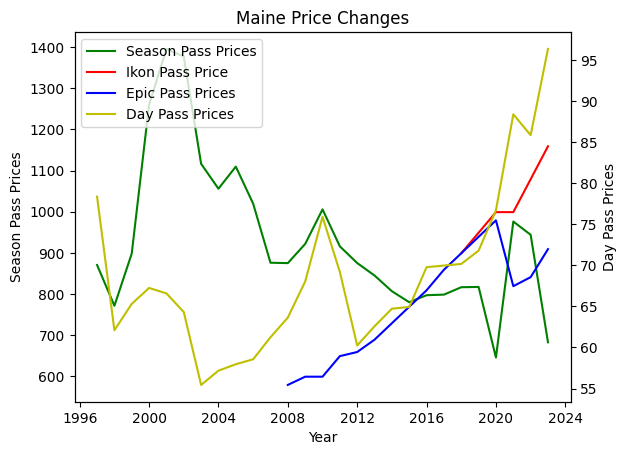

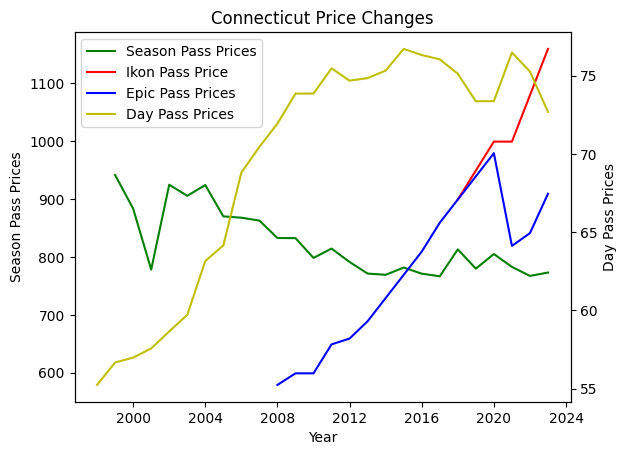

In [ ]:
## Allign date formats and create list of states
states = price_df['State'].unique()
price_df['Start Year'] = pd.to_datetime(price_df['Start Year'], format='%Y')

# Create dual axis graph for each state of pricing trends
for state in states:
  state_data = price_df.loc[price_df['State'] == state]
  yearly_prices = state_data.groupby('Start Year')[['Season Pass Adj', 'Day Pass Adj']].mean().reset_index()

  fig, ax1 = plt.subplots()
  line1 = ax1.plot(yearly_prices['Start Year'], yearly_prices['Season Pass Adj'], 'g-', label = 'Season Pass Prices')
  line2 = ax1.plot(mp_df['Year'], mp_df['Ikon'], 'r-', label = 'Ikon Pass Price')
  line3 = ax1.plot(mp_df['Year'], mp_df['Epic'], 'b-', label = 'Epic Pass Prices')
  ax1.set_xlabel('Year')
  ax1.set_ylabel('Season Pass Prices')

  ax2 = ax1.twinx()
  line4 = ax2.plot(yearly_prices['Start Year'], yearly_prices['Day Pass Adj'], 'y-', label ='Day Pass Prices')
  ax2.set_ylabel('Day Pass Prices')

  plt.title(f'{state} Price Changes')
  lines = line1 + line2 + line3 + line4
  labels = [line.get_label() for line in lines]
  ax1.legend(lines, labels, loc='upper left')

  plt.show()


# Stacked Bar Charts

## Data Prep

In [62]:
## Data import
lift_df = pd.read_csv('https://raw.githubusercontent.com/tswiger34/SkiIndustryAnalysis/main/CompleteSkiAnalysis.csv')

## Data Cleaning
# Filter the DataFrame to keep observations with valid state abbreviations
lift_df = lift_df[lift_df['State'].isin(state_mapping)]

## Aggregate at resort level
# create column for vertical rise*capacity
lift_df['rise_capacity'] = lift_df['Capacity']*lift_df['Vertical Rise']

# Pico is not included on Ikon pass in this dataset
lift_df.loc[lift_df['Resort'] == 'pico', 'Ikon'] = 1

# Aggregate at resort level: sum capacity, vert rise, and rise_capacity
lift_df = lift_df.groupby(['Resort', 'State']).agg({
    'Capacity': 'sum',
    'Vertical Rise': 'sum',
    'rise_capacity': 'sum',
    'Ikon': 'mean',
    'Epic': 'mean',
    'Resort': 'count'
}).rename(columns={'Resort': 'num_lifts'}).reset_index()
lift_df['rise_capacity'] = lift_df['rise_capacity']/1000000

In [63]:
## Making sure all Epic and Ikon resorts are included
epic_resorts = lift_df['Resort'].loc[lift_df['Epic']==1]
ikon_resorts = lift_df['Resort'].loc[lift_df['Ikon']==1]
print(epic_resorts)
print(ikon_resorts)

1              attitash
22    crotched mountain
47              mt snow
51                okemo
72                stowe
77              sunapee
85              wildcat
Name: Resort, dtype: object
33       killington
37    loon mountain
54             pico
73         stratton
74        sugarbush
75        sugarloaf
78     sunday river
Name: Resort, dtype: object


In [49]:
print(lift_df.describe())
print(lift_df.info())

           Capacity  Vertical Rise  rise_capacity       Ikon       Epic  \
count     86.000000      86.000000   8.600000e+01  86.000000  86.000000   
mean    5586.988372    2603.593023   4.914302e+06   0.081395   0.081395   
std     7903.768189    3829.694527   8.111674e+06   0.275045   0.275045   
min        0.000000       0.000000   0.000000e+00   0.000000   0.000000   
25%      650.000000     220.750000   1.553250e+05   0.000000   0.000000   
50%     2165.000000     882.500000   1.343600e+06   0.000000   0.000000   
75%     7543.750000    3407.750000   5.738425e+06   0.000000   0.000000   
max    36465.000000   17311.000000   3.711155e+07   1.000000   1.000000   

       num_lifts  
count  86.000000  
mean    4.162791  
std     3.852762  
min     1.000000  
25%     1.000000  
50%     3.000000  
75%     5.000000  
max    18.000000  
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 86 entries, 0 to 85
Data columns (total 8 columns):
 #   Column         Non-Null Count  Dtype  
---  --

## By people/hour

In [65]:
print(Ikon)

           Resort State  Capacity  Vertical Rise  rise_capacity  Ikon  Epic  \
33     killington    vt   36465.0        17311.0      37.111550   1.0   0.0   
37  loon mountain    nh   19234.0         8871.0      18.584852   1.0   0.0   
54           pico    vt   10579.0         3993.0       8.229265   1.0   0.0   
73       stratton    vt   22600.0         7755.0      23.800400   1.0   0.0   
74      sugarbush    vt   21701.0        15407.0      25.458035   1.0   0.0   
75      sugarloaf    me   18840.0        11321.0      19.185825   1.0   0.0   
78   sunday river    me   32660.0        14585.0      32.698450   1.0   0.0   

    num_lifts  
33         18  
37         10  
54          6  
73         10  
74         15  
75         13  
78         16  


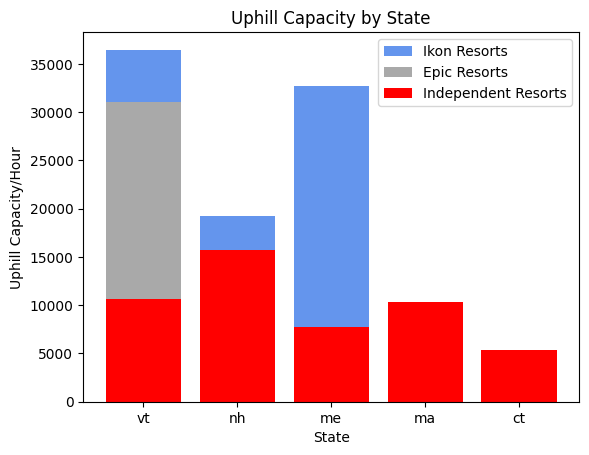

In [74]:
# Create Data Frames for Ikon, Epic, and Indy resorts
Ikon = lift_df[(lift_df['Ikon'] == 1) & (lift_df['Epic'] == 0)]
Epic = lift_df[(lift_df['Ikon'] == 0) & (lift_df['Epic'] == 1)]
Independent = lift_df[(lift_df['Ikon'] == 0) & (lift_df['Epic'] == 0)]

# Create Stacked Bar Chart of Capacity
plt.bar(Ikon['State'], Ikon['Capacity'], color='cornflowerblue')
plt.bar(Epic['State'], Epic['Capacity'], color='darkgrey')
plt.bar(Independent['State'], Independent['Capacity'], color='red')
plt.xlabel("State")
plt.ylabel("Uphill Capacity/Hour")
plt.legend(["Ikon Resorts", "Epic Resorts", "Independent Resorts"])
plt.title("Uphill Capacity by State")
plt.show()

## By Vertical Rise

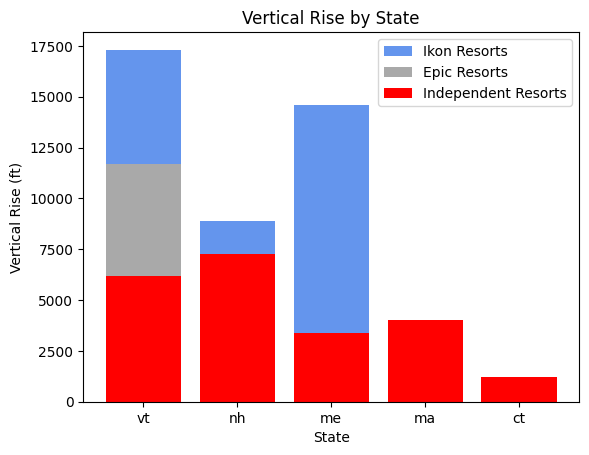

In [75]:
# Create Stacked Bar Chart of Vertical Rise
plt.bar(Ikon['State'], Ikon['Vertical Rise'], color='cornflowerblue')
plt.bar(Epic['State'], Epic['Vertical Rise'], color='darkgrey')
plt.bar(Independent['State'], Independent['Vertical Rise'], color='red')
plt.xlabel("State")
plt.ylabel("Vertical Rise (ft)")
plt.legend(["Ikon Resorts", "Epic Resorts", "Independent Resorts"])
plt.title("Vertical Rise by State")
plt.show()

## By people/hour*vertical rise

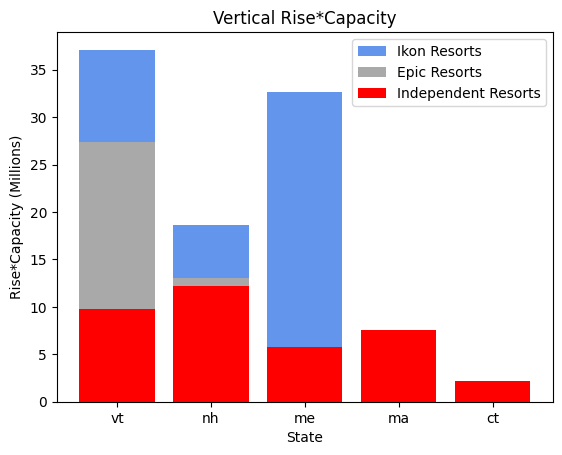

In [77]:
# Create Stacked Bar Chart of Vertical Rise
plt.bar(Ikon['State'], Ikon['rise_capacity'], color='cornflowerblue')
plt.bar(Epic['State'], Epic['rise_capacity'], color='darkgrey')
plt.bar(Independent['State'], Independent['rise_capacity'], color='red')
plt.xlabel("State")
plt.ylabel("Rise*Capacity (Millions)")
plt.legend(["Ikon Resorts", "Epic Resorts", "Independent Resorts"])
plt.title("Vertical Rise*Capacity")
plt.show()

# Export to HTML

In [67]:
from google.colab import drive
drive.mount('/content/drive')

!cp '/content/drive/MyDrive/Colab Notebooks/PriceAnalysis.ipynb' ./

!jupyter nbconvert --to html 'PriceAnalysis.ipynb'

Mounted at /content/drive
[NbConvertApp] Converting notebook PriceAnalysis.ipynb to html
[NbConvertApp] Writing 1133638 bytes to PriceAnalysis.html
